# Feature scaling

This notebook tries to follow the analysis performed for scikit-learn `Importance of Feature Scaling` notebook

In [70]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


## StandardScaler

In [8]:
X,y = load_wine(return_X_y=True, as_frame=True)
scaler = StandardScaler().set_output(transform="pandas")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30,  random_state=42
)
scaled_X_train = scaler.fit_transform(X_train)

### Theory behind standardScaler

The standarization of the features is based on the formula

$$
z = (x - u) / s
$$

where 

$z$ - noralized score
$x$ - variable
$u$ - mean
$s$ - standard deviation

Centering happens on all feature instances independly.

### Look at the scaled vs non-scaled distributions

In [68]:
def compare_distribution(pre_transformation, post_transformation):
    
    colors = ['orange', 'tomato']
    s1 = pre_transformation.rename("Pre Transformation").to_frame()
    s2 = post_transformation.rename("Post Transformation").to_frame()
    df = s1.join(s2)
    with plt.style.context("fast"):
        fig, ax = plt.subplots(nrows=1, ncols=1)
        fig.set_figheight(5)
        fig.set_figwidth(5)
        bplot = ax.boxplot(df, showmeans=True, tick_labels=df.columns, meanline=True, patch_artist=True)
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
        return fig


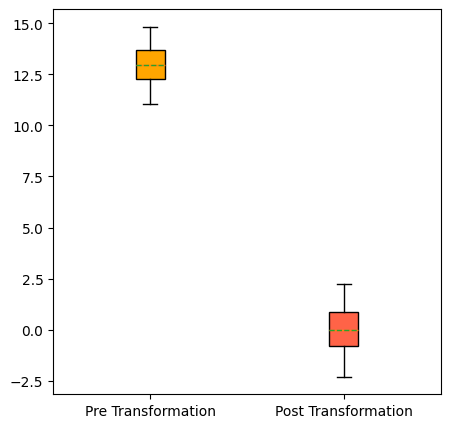

In [73]:
fig = compare_distribution(X_train["alcohol"], scaled_X_train["alcohol"])
plt.show()

As we can see for the column `alcohol` post transformation has:
- mean == 0

### KNN model

Now I want to build a KNN model to see the results for both scaled and unscaled features

In [75]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

X_plot = X[["proline", "hue"]]
X_plot_scaled = scaler.fit_transform(X_plot)
clf = KNeighborsClassifier(n_neighbors=20)

In [77]:
def fit_and_plot_model(X_plot, y, clf, ax):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf, X_plot, response_method="predict", alpha=0.5, ax=ax
    )
    disp.ax_.scatter(X_plot["proline"], X_plot["hue"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["proline"].min(), X_plot["proline"].max()))
    disp.ax_.set_ylim((X_plot["hue"].min(), X_plot["hue"].max()))
    return disp.ax_


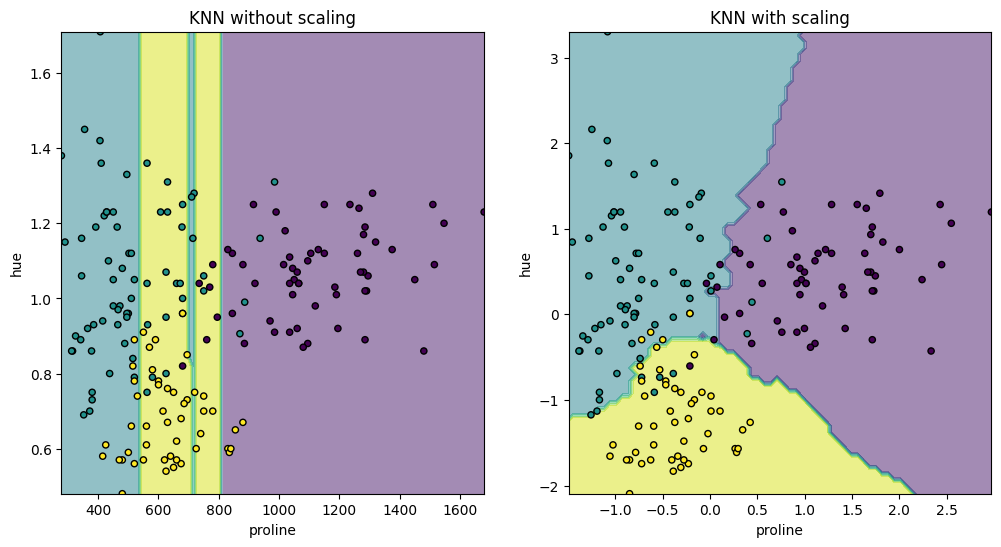

In [80]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
fit_and_plot_model(X_plot, y, clf, ax1)
ax1.set_title("KNN without scaling")

fit_and_plot_model(X_plot_scaled, y, clf, ax2)
ax2.set_title("KNN with scaling")
plt.show()

As we can see the scaling can be much beneficial for `KNN` algorighm, as the boundaries are now much clearer between the point groups.

### PCA dimensional reduction w/ StandardScaler

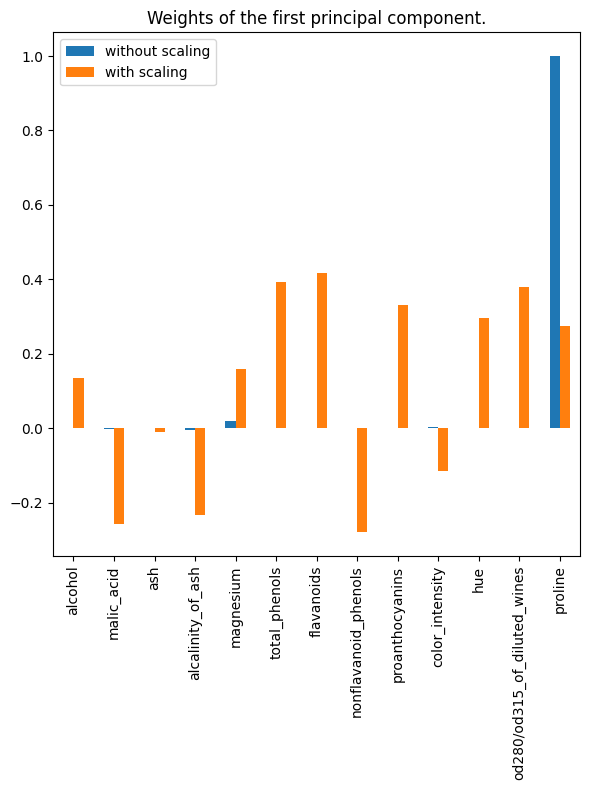

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
X_train_transformed = pca.transform(X_train)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)

first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["without scaling"]
)

first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component.", figsize=(6,8)
)

_ = plt.tight_layout()
plt.show()